# Number of Customer Arrivals in a Full Day #

Define on-peak and off-peak hours
- On-peak: (12:00 PM - 6:00 PM)
- Off-peak: (8:00 AM - 12:00 PM) and (6:00 PM - 9:00 PM)

Define Poisson distributions that model the customer arrivals
- On-peak: poisson with lambda = 42.8
- Off-peak: poisson with lambda = 20.733


In [41]:
# All necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import poisson, probplot

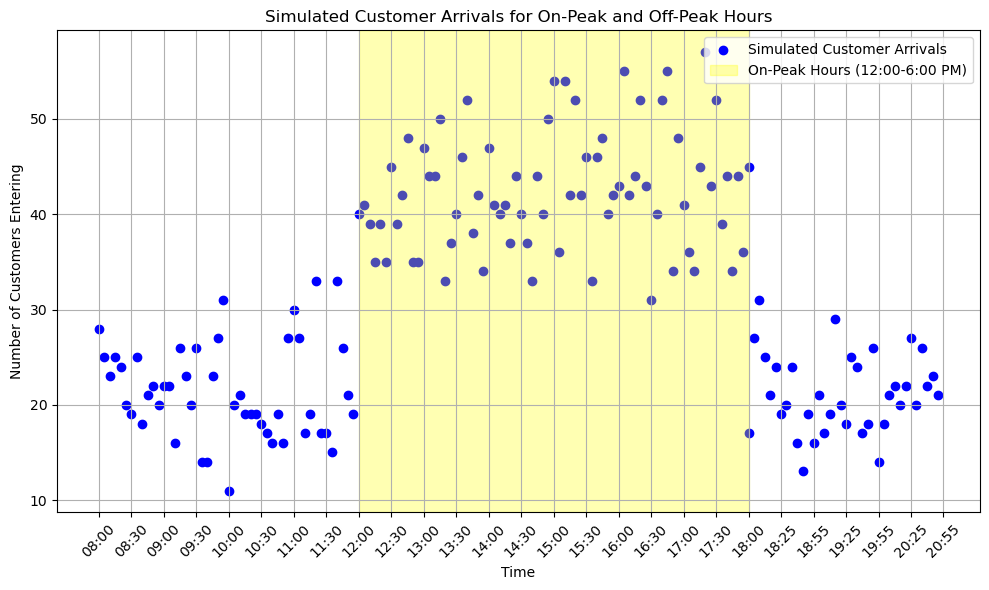

In [42]:
# Time intervals from 8:00 AM to 9:00 PM (every 5 minutes) in military time
time_intervals = pd.date_range("08:00", "21:00", freq="5min").strftime('%H:%M')

# Split time into on-peak and off-peak intervals
off_peak_morning_intervals = time_intervals[(time_intervals >= "08:00") & (time_intervals < "12:00")]
on_peak_intervals = time_intervals[(time_intervals >= "12:00") & (time_intervals <= "18:00")]
off_peak_evening_intervals = time_intervals[(time_intervals >= "18:00") & (time_intervals < "21:00")]

# Simulate data for a full day with different lambdas depending on on-peak vs. off-peak
off_peak_morning_data = np.random.poisson(20.733, len(off_peak_morning_intervals))   # Off-peak mornings
on_peak_data = np.random.poisson(42.8, len(on_peak_intervals))                       # On-peak midday
off_peak_evening_data = np.random.poisson(20.733, len(off_peak_evening_intervals))   # Off-peak evenings

# Combine all the data and intervals in the correct order
combined_intervals = np.concatenate([off_peak_morning_intervals, on_peak_intervals, off_peak_evening_intervals])
combined_data = np.concatenate([off_peak_morning_data, on_peak_data, off_peak_evening_data])

# Plot the time series scatterplot
plt.figure(figsize=(10, 6))

# Create a scatter plot for all data
plt.scatter(combined_intervals, combined_data, color='b', label='Simulated Customer Arrivals')

# Highlight on-peak period (12:00 PM to 6:00 PM) with a shaded area
plt.axvspan('12:00', '18:00', color='yellow', alpha=0.3, label="On-Peak Hours (12:00-6:00 PM)")

# Labeling the graph
plt.xlabel('Time')
plt.ylabel('Number of Customers Entering')
plt.title('Simulated Customer Arrivals for On-Peak and Off-Peak Hours')

# Adjust x-axis labels to show only every 30 minutes
plt.xticks(np.arange(0, len(combined_intervals), 6), labels=combined_intervals[::6], rotation=45)

# Show the legend and grid
plt.legend(loc="upper right")
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

# Simulated inventory depletion of the different product categories over 1 hour #
- Compare how different product categories deplete at different rates (ex: bakery always depletes slower than frozen & snacks)
- Compare how inventory depletion differs between on-peak and off-peak times (ex: frozen items depletes faster at on-peak, compares to off-peak)

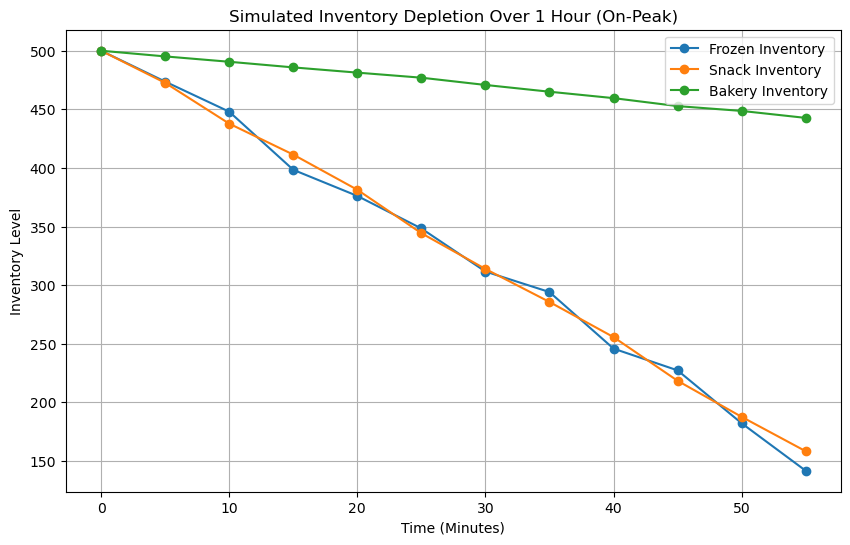

In [44]:
# Simulating for 1 hour
time_intervals = np.arange(0, 60, 5)  # over 1-hour total, 5 minute intervals

# Initialize initial inventory levels
inventory_frozen = 500
inventory_snack = 500
inventory_bakery = 500

# Store inventory data over time
inventory_frozen_over_time = [inventory_frozen]
inventory_snack_over_time = [inventory_snack]
inventory_bakery_over_time = [inventory_bakery]

# Lambda values for customer arrivals
lambda_on_peak = 42.8
lambda_off_peak = 20.733

# Simulate the inventory over the full day
for interval in time_intervals:
    if interval > 0:
        customers = np.random.poisson(lambda_on_peak)
        frozen_removal = np.random.beta(0.726, 0.603) * (49.903 - 11.097) + 11.097  # Scale beta distribution to match range
        snack_removal = np.random.normal(31.933, 4.297)
        bakery_removal = np.random.uniform(4.0, 7.0)
        
        # Update inventories
        inventory_frozen -= frozen_removal
        inventory_snack -= snack_removal
        inventory_bakery -= bakery_removal
        
        # Store updated inventory levels
        inventory_frozen_over_time.append(inventory_frozen)
        inventory_snack_over_time.append(inventory_snack)
        inventory_bakery_over_time.append(inventory_bakery)

# Plotting the simulated inventory levels over time
plt.figure(figsize=(10, 6))
plt.plot(time_intervals, inventory_frozen_over_time, label='Frozen Inventory', marker='o')
plt.plot(time_intervals, inventory_snack_over_time, label='Snack Inventory', marker='o')
plt.plot(time_intervals, inventory_bakery_over_time, label='Bakery Inventory', marker='o')

# Design graph
plt.xlabel('Time (Minutes)')
plt.ylabel('Inventory Level')
plt.title('Simulated Inventory Depletion Over 1 Hour (On-Peak)')
plt.legend()
plt.grid(True)
plt.show()

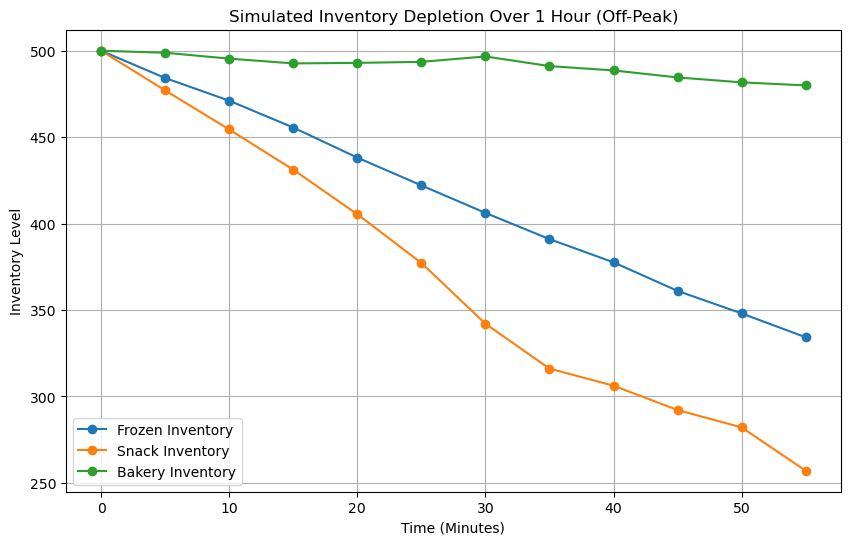

In [45]:
# Simulating for 1 hour
time_intervals = np.arange(0, 60, 5)  # over 1-hour total, 5 minute intervals

# Initialize initial inventory levels (modify as necessary)
inventory_frozen = 500
inventory_snack = 500
inventory_bakery = 500

# Store inventory data over time
inventory_frozen_over_time = [inventory_frozen]
inventory_snack_over_time = [inventory_snack]
inventory_bakery_over_time = [inventory_bakery]

# Lambda values for customer arrivals
lambda_on_peak = 41.52
lambda_off_peak = 20.83

# Simulate the inventory over the day
for interval in time_intervals:
    if interval > 0:
        customers = np.random.poisson(lambda_off_peak)
        frozen_removal = np.random.normal(14.733, 1.436)
        snack_removal = np.random.normal(22.667, 11.276)
        bakery_removal = np.random.normal(2.667, 1.989)
        
        # Update inventories
        inventory_frozen -= frozen_removal
        inventory_snack -= snack_removal
        inventory_bakery -= bakery_removal
        
        # Store updated inventory levels
        inventory_frozen_over_time.append(inventory_frozen)
        inventory_snack_over_time.append(inventory_snack)
        inventory_bakery_over_time.append(inventory_bakery)

# Plotting the simulated inventory levels over time
plt.figure(figsize=(10, 6))
plt.plot(time_intervals, inventory_frozen_over_time, label='Frozen Inventory', marker='o')
plt.plot(time_intervals, inventory_snack_over_time, label='Snack Inventory', marker='o')
plt.plot(time_intervals, inventory_bakery_over_time, label='Bakery Inventory', marker='o')

plt.xlabel('Time (Minutes)')
plt.ylabel('Inventory Level')
plt.title('Simulated Inventory Depletion Over 1 Hour (Off-Peak)')
plt.legend()
plt.grid(True)
plt.show()